# Linear Regression
Linear Model is the form of supervised learning, in which we feed the model/algorithm set of attributes called dependent variables and dependent variable which we need to predict. Initially, we provide independent and their corresponding dependent variable to train the model. The basic idea is to obtain best fit line along our datapoints and best fit line is which has minimumm sum of distance between datapoints to our regression line. 

Basic equation for linear model can be defined as Euclidean dot product between 2 vectors:
$$ f(x; w) = w^T x = \sum_{0}^{D} w_i x_i $$
where 'w' is the weight vector and 'x' is the input vector.

In this assignment, we will be discusing **Least Squares** and **Least Mean Squares** to obtain the best fit line.


# Data

### Description

This dataset is about California housing. This dataset is appearred in 1997 paper titled Sparse Spatial Autoregressions by Pace, R. Kelley and Ronald Barry. This dataset was built using 1990 California census data. It contains one row per census block group. A block group is the smallest geographical unit for which the U.S. Census Bureau publishes sample data (a block group typically has a population of 600 to 3,000 people).
* Block Groups are called 'Districts'.

#### Features of the dataset:
1. longitude: A measure of how far west a house is; a higher value is farther west
2. latitude: A measure of how far north a house is; a higher value is farther north
3. housingMedianAge: Median age of a house within a block; a lower number is a newer building
4. totalRooms: Total number of rooms within a block
5. totalBedrooms: Total number of bedrooms within a block
6. population: Total number of people residing within a block
7. households: Total number of households, a group of people residing within a home unit, for a block
8. medianIncome: Median income for households within a block of houses (measured in tens of thousands of US Dollars)
9. medianHouseValue: Median house value for households within a block (measured in US Dollars)
10. oceanProximity: Location of the house w.r.t ocean/sea


### Reading the data

In [20]:
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import numpy as np
from sklearn.impute import SimpleImputer

In [2]:
dataset = pd.read_csv("housing.csv")

In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
longitude             20640 non-null float64
latitude              20640 non-null float64
housing_median_age    20640 non-null int64
total_rooms           20640 non-null int64
total_bedrooms        20433 non-null float64
population            20640 non-null int64
households            20640 non-null int64
median_income         20640 non-null float64
median_house_value    20640 non-null int64
ocean_proximity       20640 non-null object
dtypes: float64(4), int64(5), object(1)
memory usage: 1.6+ MB


### Plots for understanding and analysis 

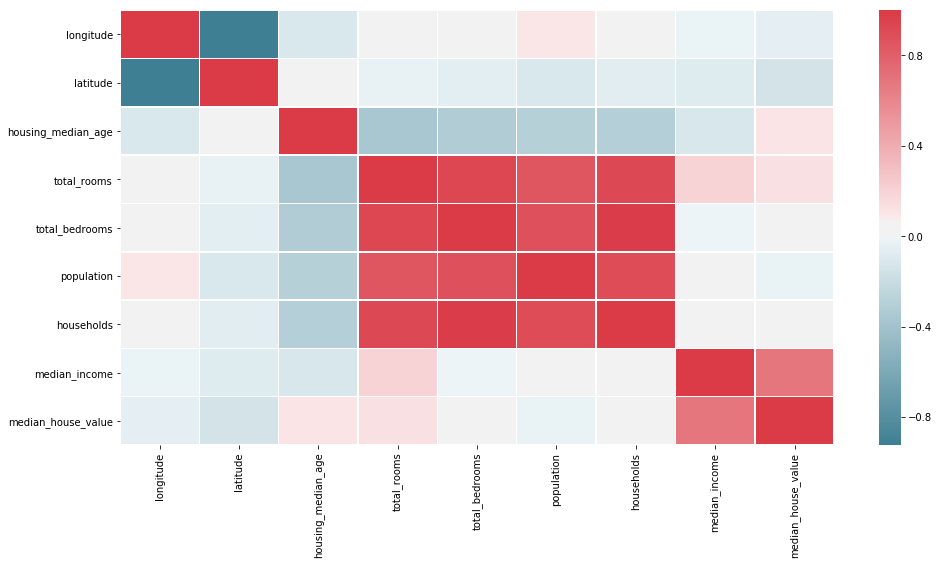

In [4]:
# Correlation through heat map
cmap = sb.diverging_palette(220, 10, as_cmap=True) 
corr = dataset.corr() 
plt.figure(figsize = (16,8)) 
sb.heatmap(corr, xticklabels=corr.columns.values, yticklabels=corr.columns.values, cmap=cmap, linewidths=.5)

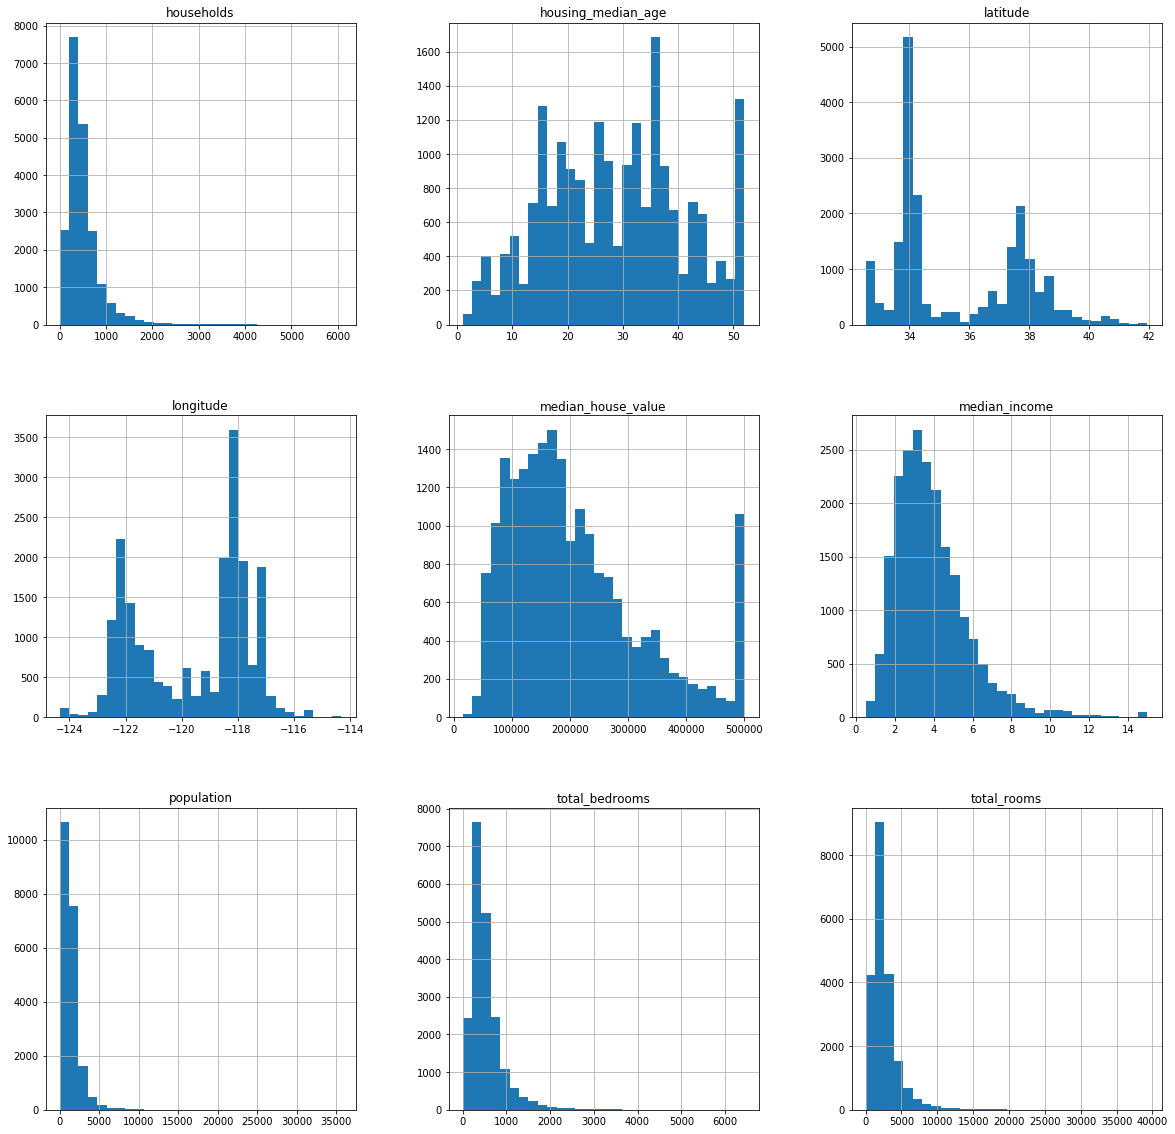

In [5]:
dataset.hist(bins = 30, figsize=(20,20))
plt.show()

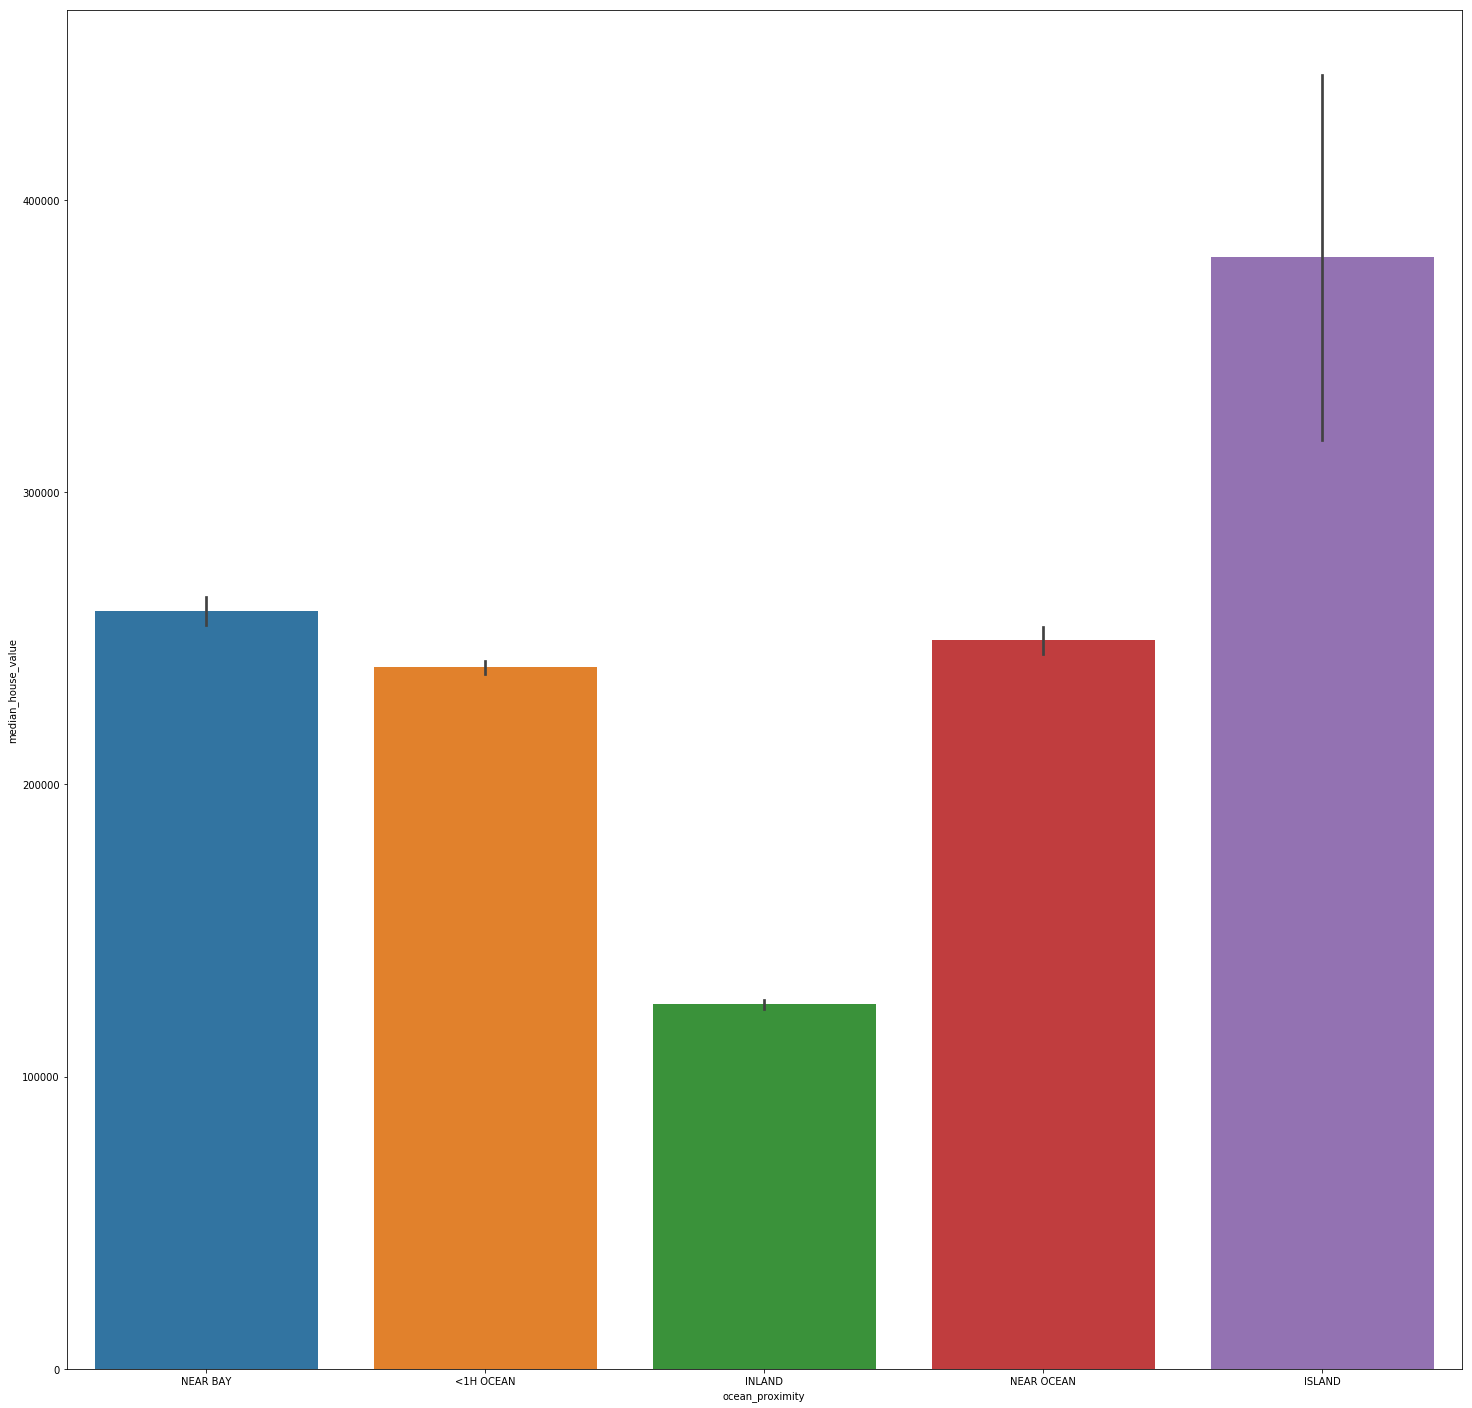

In [6]:
plt.figure(figsize=(25,25))
sb.barplot(data= dataset, x="ocean_proximity", y="median_house_value")

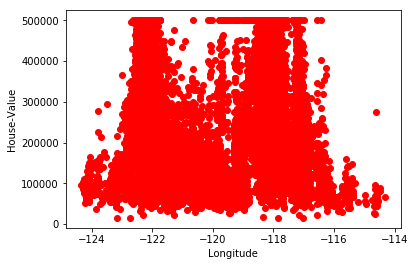

In [7]:
plt.scatter(dataset.iloc[:,0:1], dataset.iloc[:,8:9], color = 'red')
plt.xlabel("Longitude")
plt.ylabel("House-Value")
plt.show()

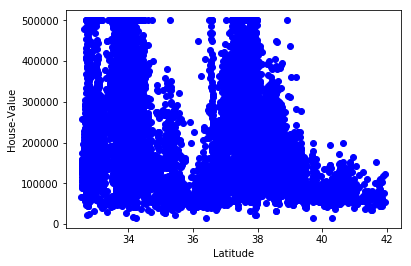

In [8]:
plt.scatter(dataset.iloc[:,1:2], dataset.iloc[:,8:9], color = 'blue')
plt.xlabel("Latitude")
plt.ylabel("House-Value")
plt.show()

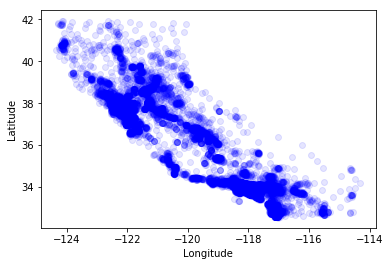

In [9]:
plt.scatter(dataset.iloc[:,0:1], dataset.iloc[:,1:2], color = 'blue', alpha=0.1)
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()

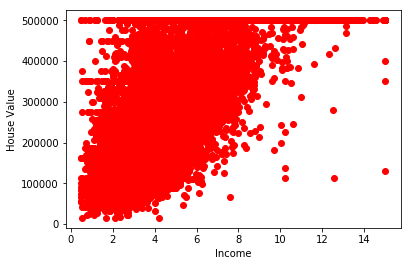

In [10]:
plt.scatter( dataset.iloc[:,7:8],dataset.iloc[:,8:9], color = 'red')
plt.xlabel("Income")
plt.ylabel("House Value")
plt.show()

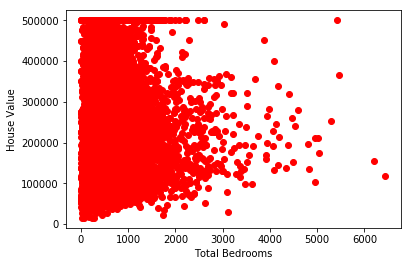

In [11]:
plt.scatter( dataset.iloc[:,4:5],dataset.iloc[:,8:9], color = 'red')
plt.xlabel("Total Bedrooms")
plt.ylabel("House Value")
plt.show()

### Observation

We used certain libraries to pre process our dataset. One important observation we found regarding missing data in our dataset and we removed all that missing rows from our dataset. Also we made some observations based on plotting various graphs between feature values. We found that households are more dense in 37-39 Latitude range and -121 to -123 longitudnal range. Moreover, housing is more expensive in -122 and between -117 to -119 of longitude range and between 33 to 35 and 37-38 latitude range. 
Further, we have also observed that most of the districts have population and total number of rooms are less than 5000. If we compare households values with respect to the income, we found that as the income increases beyond 8, people are more likely to buy high valued houses. While people with less income are scattered in terms of house valuation. And also we have found that households near island are expensive while in other categories values are dispersed.
Apart from this we have also generated a heat map, through which we try to show the correlation between the columns that ranges between -1 to 1, with negative as the columns are negatively correlated and 0 means no correlation between them and 1 being the highest correlation.

### Data Preprocessing

In [12]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
longitude             20640 non-null float64
latitude              20640 non-null float64
housing_median_age    20640 non-null int64
total_rooms           20640 non-null int64
total_bedrooms        20433 non-null float64
population            20640 non-null int64
households            20640 non-null int64
median_income         20640 non-null float64
median_house_value    20640 non-null int64
ocean_proximity       20640 non-null object
dtypes: float64(4), int64(5), object(1)
memory usage: 1.6+ MB


In [13]:
corr = dataset.corr()
corr

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924664,-0.108197,0.044568,0.069608,0.099773,0.055310,-0.015176,-0.045967
latitude,-0.924664,1.000000,0.011173,-0.036100,-0.066983,-0.108785,-0.071035,-0.079809,-0.144160
housing_median_age,-0.108197,0.011173,1.000000,-0.361262,-0.320451,-0.296244,-0.302916,-0.119034,0.105623
total_rooms,0.044568,-0.036100,-0.361262,1.000000,0.930380,0.857126,0.918484,0.198050,0.134153
total_bedrooms,0.069608,-0.066983,-0.320451,0.930380,1.000000,0.877747,0.979728,-0.007723,0.049686
population,0.099773,-0.108785,-0.296244,0.857126,0.877747,1.000000,0.907222,0.004834,-0.024650
households,0.055310,-0.071035,-0.302916,0.918484,0.979728,0.907222,1.000000,0.013033,0.065843
median_income,-0.015176,-0.079809,-0.119034,0.198050,-0.007723,0.004834,0.013033,1.000000,0.688075
median_house_value,-0.045967,-0.144160,0.105623,0.134153,0.049686,-0.024650,0.065843,0.688075,1.000000


The above mentioned block will help us to know that how columns are correlated to each other on the scale of -1 to 1. 

In [14]:
corr['median_house_value'].sort_values(ascending = False)

median_house_value    1.000000
median_income         0.688075
total_rooms           0.134153
housing_median_age    0.105623
households            0.065843
total_bedrooms        0.049686
population           -0.024650
longitude            -0.045967
latitude             -0.144160
Name: median_house_value, dtype: float64

We have just sort the columns in ascending order according to their correlation value with respect to our dependent variable i.e 'median_house_value'.

In [15]:
dataset.columns[dataset.isna().any()].tolist()

['total_bedrooms']

From the above, we get to know the column in our dataset having null values.

Although the column having missing values having almost no correlation with our dependent column, but still we can handle the missing values. Either by replacing the null values by Mean, Median, most occured values or simply by removing the values having null values in that.

In [16]:
# Splitting the independent and dependent variable
X = dataset.iloc[:, :8].values
y = dataset.iloc[:, -1:].values
t = dataset.iloc[:, 8:9].values

In [17]:
X.shape

(20640, 8)

In [18]:
t.shape

(20640, 1)

In [21]:
imputer = SimpleImputer(strategy='median')
imputer = imputer.fit(X)
X= imputer.transform(X)

Above implemented Imputer class will replace the null values in the columns with **median** value. 

#### Encoding
We have one categorical predictor(ocean_proximity) in our dataset and most of our machine learning algorithms works with numerical value. So we will convert text value for this attribute to the numerical values.

In [23]:
from sklearn.preprocessing import LabelBinarizer
encoder = LabelBinarizer()
y = encoder.fit_transform(y)

In [24]:
X = np.hstack((X,y))
print(X.shape, " ",y.dtype)

(20640, 13)   int32


#### Feature Scaling
another most important aspect is feature scaling. Machine Learning algorithms do not perform well when data have very different scales. For example, in our dataset **median_income** ranges from 0 to 15 while **total_rooms** ranges from 0 to 39,320. So to scale all the feature variable is important to get good results.

This can be done in various ways:
1. Min-Max Normalization
2. Mean Normalization
3. Standardization

In [25]:
def normalize(X):
    nX = (X- X.mean())/ X.std()
    return nX

In [26]:
nX = normalize(X)
nX.shape

(20640, 13)

# Method

### Review

In the regression problems our target values are real numbers and our goal is to find best fit line for our data. 
so simple line equation is:
$$ f(x;w) = w_1 x + w_0 $$
if we have multiple inputs for x:
$$ f(x;w) = w_D x_D + .....+ w_1 x_1 + w_0 $$
where D, is the number of attributes or feature in our input data.

So main idea behind getting best fit line is find and minimize the cost/Error function. By minimizing error function we mean, minimize the sum of Euclidean distances between target values and our predicted values. 
$$ E(w) =  \sum_{i=1}^{N} (f(x_i;w_i) - t_i)^2 $$

1. For the **Least squares** we try to minimize the above mentioned error function. Above mentioned equation is quadratic equation, we will get minimum value by taking derivative of that eqaution with respect to the 'w' and put that equal to 0.
After solving we will get:
$$ w = (X^T X)^{-1} X^T t $$
where, X = Input matrix of N * D (N = Number of samples and D = Number of attributes)

       t = Matrix of the target value
       
       w = Matrix of the weights corresponding to each attribute
       
2. **Least Mean Squares**: Unlike Least Squares method it does not use all the data available in one go but, it follows the Online Learning process. By this we mean that we calculate the value of weight at each iteration (for each datapoint) and based on calculated values in previous step, it makes new estimation.

    It is represented as:
    $$ w^{k+1} = w^k - \alpha \nabla E_k $$
    For this equation, We initially guess the value of 'w'

    k = represents the steps in repetition 

    $E_k$ = represents the error rate for k sample.

    $\alpha$ = Learning Rate
    Further, we calculate the gradient i.e. $\nabla E_k$ and finally gets:
    $$ w^{k+1} = w^k - \alpha ({w^{(k)}}^T - t_k) x_k $$
    This is final weight vector, LMS will compute for each sample and this process can be repeated for any nnumber of times to    get the best weight (which give us best fitting line for our data points).

### Explanation of Codes
Two algorithms are implemented as part of implementaion i.e **Least Squares** and **Least Mean Squares**. A base class **BaseModel** is implemented which is having only two abstract method 'train' and 'use', and they are defined further in different classes which are inheritig BaseModel class. 

Further, **LinearModel** class is implemented which is inheriting "BaseModel" having its constructor in which "Weight" is defined as None. And having its own methods **_check_matrix -** This method checks whether the passed matrix is 2-dimentional or not and **add_ones-** add column of basis to the passed matrix in its parameter. Apart from its two method, this class has 2 other abstract method of its parent class "BaseModel" but not providing defination for that abstract methods.

**Least Square**

**LinearRegress** is the class which is implementing the code for Linear Regression through Least Square method. This class is inheritinng "LinearModel" class. It has its own constructor which is calling constructor for the parent class and will initialize "self.w" i.e the weight which will be used further in whole code. This class is providing the defination for the abstract methods of its super class (train and use methods). 

'train method': This method is accepting 2 parameter, one is 2-dimentional matrix of predictors and another is Target vector. Basically, this method is calculating the weights which when dot product with our predictor matrix will give best prediction line. This method first add "ones" to the passed 2-D matrix by calling its super class method and then calculated the weights by "np.linalg.inv" method.

'use method': This methods finally return the predicted value vectors calculated with the dot product of 'weights' calculated in train method and 'predictor' matrix.

**Least Mean Squares**

**LMS** is the class providing code for implemeting best fit line through Least Mean Squares method. Similar to the Least Square class, it is inheriting "LinearModel" class. Similarly its constructor calling its parent class constructor and apart from that its has its own member variable "self.alpha", which means when call this class, we need pass learning rate. And unlike to previos class it has its own method "train_step" besides implementing abstarct methods(train and use methods) of its super class. 

'train method': This method is bit different from traain method of previous class, it first initializing weight vector with zeros after adding 'ones' to the 2-D matrix that is passed as parameter to this function. Further, it is iterating over the number of samples in 2-D matrix and calling 'train_step' method of its own class, passing particular row as vector and actual value(t) correspondingly. 

'train_step': This method is called fromm train method. It first convert actual value 't' to 1*1 matrix. It further checks that **if weights are not initialized**(if this method is directly called from outside), then initialize weight vector and adding ones after converting vector 'x'(Single Sample) to 2-D matrix that is passed into this function. **if weights are initialized** (this function is called from train method), then it only reshape 'x' vector(Single Sample) to 2-D matrix passed to this function. And futher evelautes 'Weight' vector corresponding to the particularr sample passed into it and selts in 'self.w'.  

'use method': This method similar to the previos class 'use' method calculates predicted value vector based on best 'weight vector (self.w)' calculated through train and train_step methods.


### Correct Implementation

In [27]:
import numpy as np 
from abc import ABC, abstractmethod

# Super class for machine learning models 

class BaseModel(ABC):
    """ Super class for ITCS Machine Learning Class"""
    
    @abstractmethod
    def train(self, X, T):
        pass

    @abstractmethod
    def use(self, X):
        pass

    
class LinearModel(BaseModel):
    """
        Abstract class for a linear model 
        
        Attributes
        ==========
        w       ndarray
                weight vector/matrix
    """

    def __init__(self):
        """
            weight vector w is initialized as None
        """
        self.w = None

    # check if the matrix is 2-dimensional. if not, raise an exception    
    def _check_matrix(self, mat, name):
        if len(mat.shape) != 2:
            raise ValueError(''.join(["Wrong matrix ", name]))
        
    # add a basis
    def add_ones(self, X):
        """
            add a column basis to X input matrix
        """
        self._check_matrix(X, 'X')
        return np.hstack((np.ones((X.shape[0], 1)), X))

    ####################################################
    #### abstract funcitons ############################
    @abstractmethod
    def train(self, X, T):
        """
            train linear model
            
            parameters
            -----------
            X     2d array
                  input data
            T     2d array
                  target labels
        """        
        pass
    
    @abstractmethod
    def use(self, X):
        """
            apply the learned model to input X
            
            parameters
            ----------
            X     2d array
                  input data
            
        """        
        pass 

#### Least Squares

In [28]:
# Linear Regression Class for least squares
class LinearRegress(LinearModel): 
    """ 
        LinearRegress class 
        
        attributes
        ===========
        w    nd.array  (column vector/matrix)
             weights
    """
    def __init__(self):
        LinearModel.__init__(self)
        
    # train lease-squares model
    def train(self, X, T):
        X = super().add_ones(X)
        self.w = np.linalg.inv(X.T @ X) @ X.T @ T
    
    # apply the learned model to data X
    def use(self, X):
        X = super().add_ones(X)
        Y = X @ self.w
        return Y

#### Least Mean Squares

In [29]:
# import collections # for checking iterable instance
import copy
# LMS class 
class LMS(LinearModel):
    """
        Lease Mean Squares. online learning algorithm
    
        attributes
        ==========
        w        nd.array
                 weight matrix
        alpha    float
                 learning rate
    """
    def __init__(self, alpha):
        LinearModel.__init__(self)
        self.alpha = alpha
    
    # batch training by using train_step function
    def train(self, X, T):
        X1= super().add_ones(X)
        self.w = np.zeros(X1.shape[1]).reshape((1,-1))
        
        for i in range(1):
            for k in range(X.shape[0]):
                self.train_step(X1[k,:], T[k])

    # train LMS model one step 
    # here the x is 1d vector
    def train_step(self, x, t):
        t = t.reshape((-1,1))
        if(self.w is None):
            X1 = super().add_ones(np.reshape(x,(1,x.shape[0])))
            self.w = np.zeros(X1.shape[1]).reshape((1,-1))
        else:
            X1 = np.reshape(x,(1,x.shape[0]))
        y =  X1 @ self.w.T
        self.w = self.w - self.alpha * (y - t) * X1
    
    # apply the current model to data X
    def use(self, X):
        X1 = super().add_ones(X)
        y =  X1 @ self.w.T
        return y
        

### Preliminary Test

In [30]:
##################### WHAT I WILL RELEASE ############

# Self-Test code for accuracy of your model - DO NOT MODIFY THIS
# Primilnary test data
X = np.array([[2,5],
              [6,2],
              [1,9],
              [4,5],
              [6,3],
              [7,4],
              [8,3]])
T = X[:,0, None] * 3 - 2 * X[:, 1, None] + 3
N = X.shape[0]

def rmse(T, Y):
    return np.sqrt(np.sum((T-Y)**2))

model_names = ['LS', 'LMS_All', 'LMS_1STEP']
models = [LinearRegress(), LMS(.02), LMS(0.02)]
#train
for i, model in enumerate(models):
    print("training ", model_names[i], "...") 
    if i == len(models) -1: 
        # train only one step for LMS2
        model.train_step(X[0], T[0])
    else:
        model.train(X, T)

def check(a, b, eps=np.finfo(float).eps):
    if abs(a-b) > eps:
        print("failed.", a, b)
    else:
        print("passed.")

errors = [1.19e-13, 2.8753214702, 38.0584918251]
for i, model in enumerate(models):
    print("---- Testing ", model_names[i], "...", end=" ") 
    
    # rmse test
    err = rmse(T, model.use(X))
    if check(err, errors[i], eps=1e-10):
        print ("check your weights: ", model.w)
        print ("oracle: ", )

training  LS ...
training  LMS_All ...
training  LMS_1STEP ...
---- Testing  LS ... passed.
---- Testing  LMS_All ... passed.
---- Testing  LMS_1STEP ... passed.


# Experiments

### Description, codes

#### Partitioning the datasets

In [31]:
def partition(X, T, ratio=[0.8, 0.2]): 
    
    assert(np.sum(ratio) == 1)
    
    idxs = np.random.permutation(X.index)

    N = X.shape[0]
    
    X_train = np.zeros(shape=(1,X.shape[1]))
    T_train = np.zeros(shape=(1,T.shape[1]))
    
    X_test = np.zeros(shape=(1,X.shape[1]))
    T_test = np.zeros(shape=(1,T.shape[1]))
    
    j = 0
    for k, r in enumerate(ratio):
        rows = int(round(N * r))  # number of rows
        i = 0
        if k == len(ratio) -1:
            for i in range(rows):
                if(j< N):
                    X_test = np.vstack((X_test,X.iloc[idxs[j]:idxs[j]+1, :]))
                    T_test = np.vstack((T_test, T.iloc[idxs[j]:idxs[j]+1, :]))
                    j+=1
        else:
            for i in range(rows):
                X_train = np.vstack((X_train,X.iloc[idxs[j]:idxs[j]+1, :]))
                T_train = np.vstack((T_train, T.iloc[idxs[j]:idxs[j]+1, :]))
                j+=1

    X_train = np.delete(X_train, (0), axis=0)
    X_test = np.delete(X_test, (0), axis=0)
    T_train = np.delete(T_train, (0), axis=0)
    T_test = np.delete(T_test, (0), axis=0)
    return X_train, T_train, X_test, T_test

The above implemented **Partition** class is randomly splitting the datasets into 4 different training and test sets. Out of them 'X_train and T_train' conatins 80% of the toatl data and willbe used to train the model. And 'X_test and T_test' will be used for testing the data.

The parttion function is called from below cell.

In [32]:
X_train, T_train, X_test, T_test = partition(pd.DataFrame(nX), pd.DataFrame(t))

In [33]:
print("Shapes of X_train{},T_train{}, X_test{}, T_test{}".format(X_train.shape, T_train.shape, X_test.shape, T_test.shape))

Shapes of X_train(16512, 13),T_train(16512, 1), X_test(4128, 13), T_test(4128, 1)


#### Least Squares

In [34]:
ls = LinearRegress()
ls.train(X_train, T_train)
y_ls = ls.use(X_test)

In [35]:
np.sqrt(np.mean((T_test - y_ls)**2))

69834.49897288298

#### Least Mean Squares

In [36]:
lms = LMS(.00029999)
lms.train(X_train, T_train)
y_lms = lms.use(X_test)

In [37]:
print(np.sqrt(np.mean((T_test - y_lms)**2)))

109521.48889574091


#### Description of codes

In the above cell, we are creating an object of LinearRegress class, which is further used to call its function. First 'train' method is called in which we are passing our training datasets (Splitted above). This function will calculate the best possible weight according to the data. Secondly, 'use' method is called in which we are passing our test dataset on which it is calculating target values based on the weights calculated in previous method and further these predicted value be comapred with actual test values splitted above.

In this call, we are creating LMS object (lms), with its help we are calling its 'train' method in which we are passing our training datasets. Further, we are calling its 'use' function which is returning predicted values vector, that can be compared further with the test value to check the accuracy 

### Visualization of results

#### Visualization through Least Square

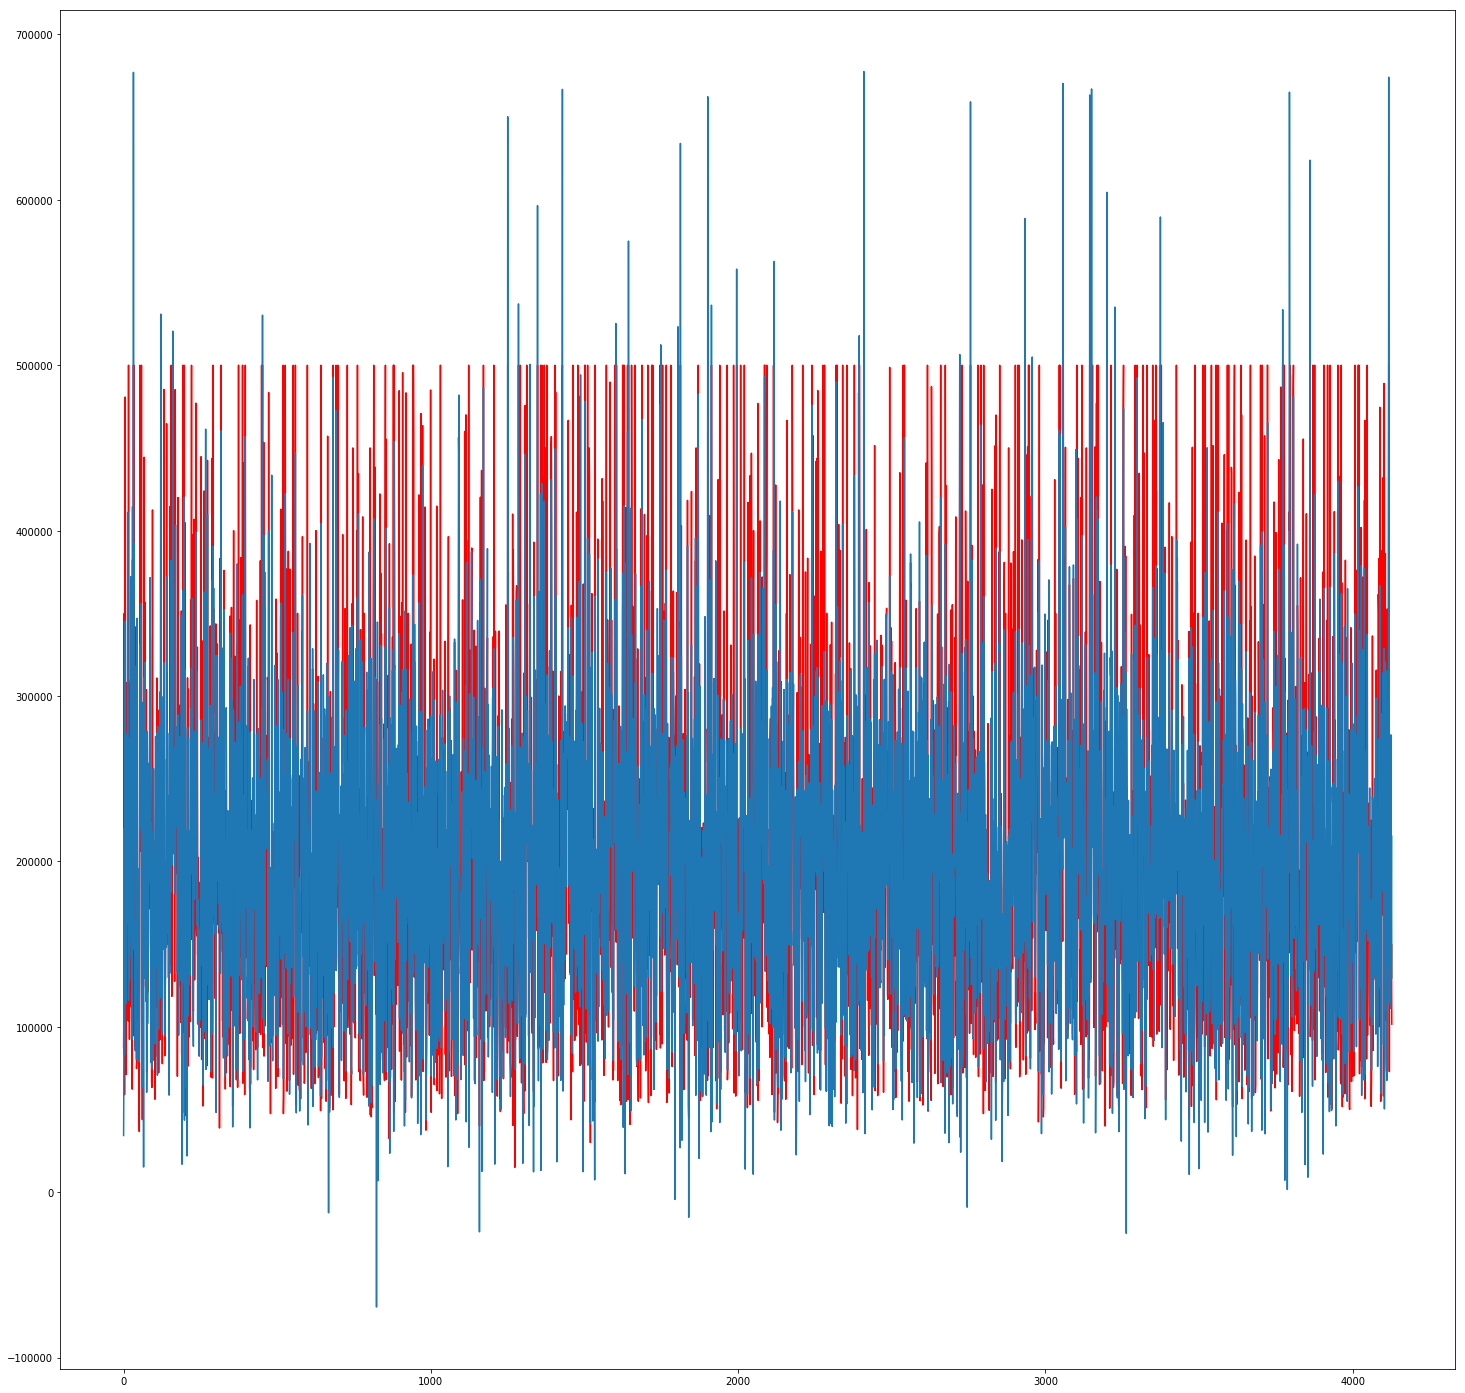

In [38]:
plt.figure(figsize=(25,25))
plt.plot(T_test,'r')
plt.plot(y_ls)

The above plot is between our actual values of our dependent variable(T_test) and the values predicted by our model. The values in 'Red' color reperesents our T_test values whereas values in blue points to predicted values by our model. We can clearly see that for there is good difference between the value actual and predicted values. Also there are some extereme points in our graph, that can be because of the outliers.

#### Visuallization through Least Mean Sqaures

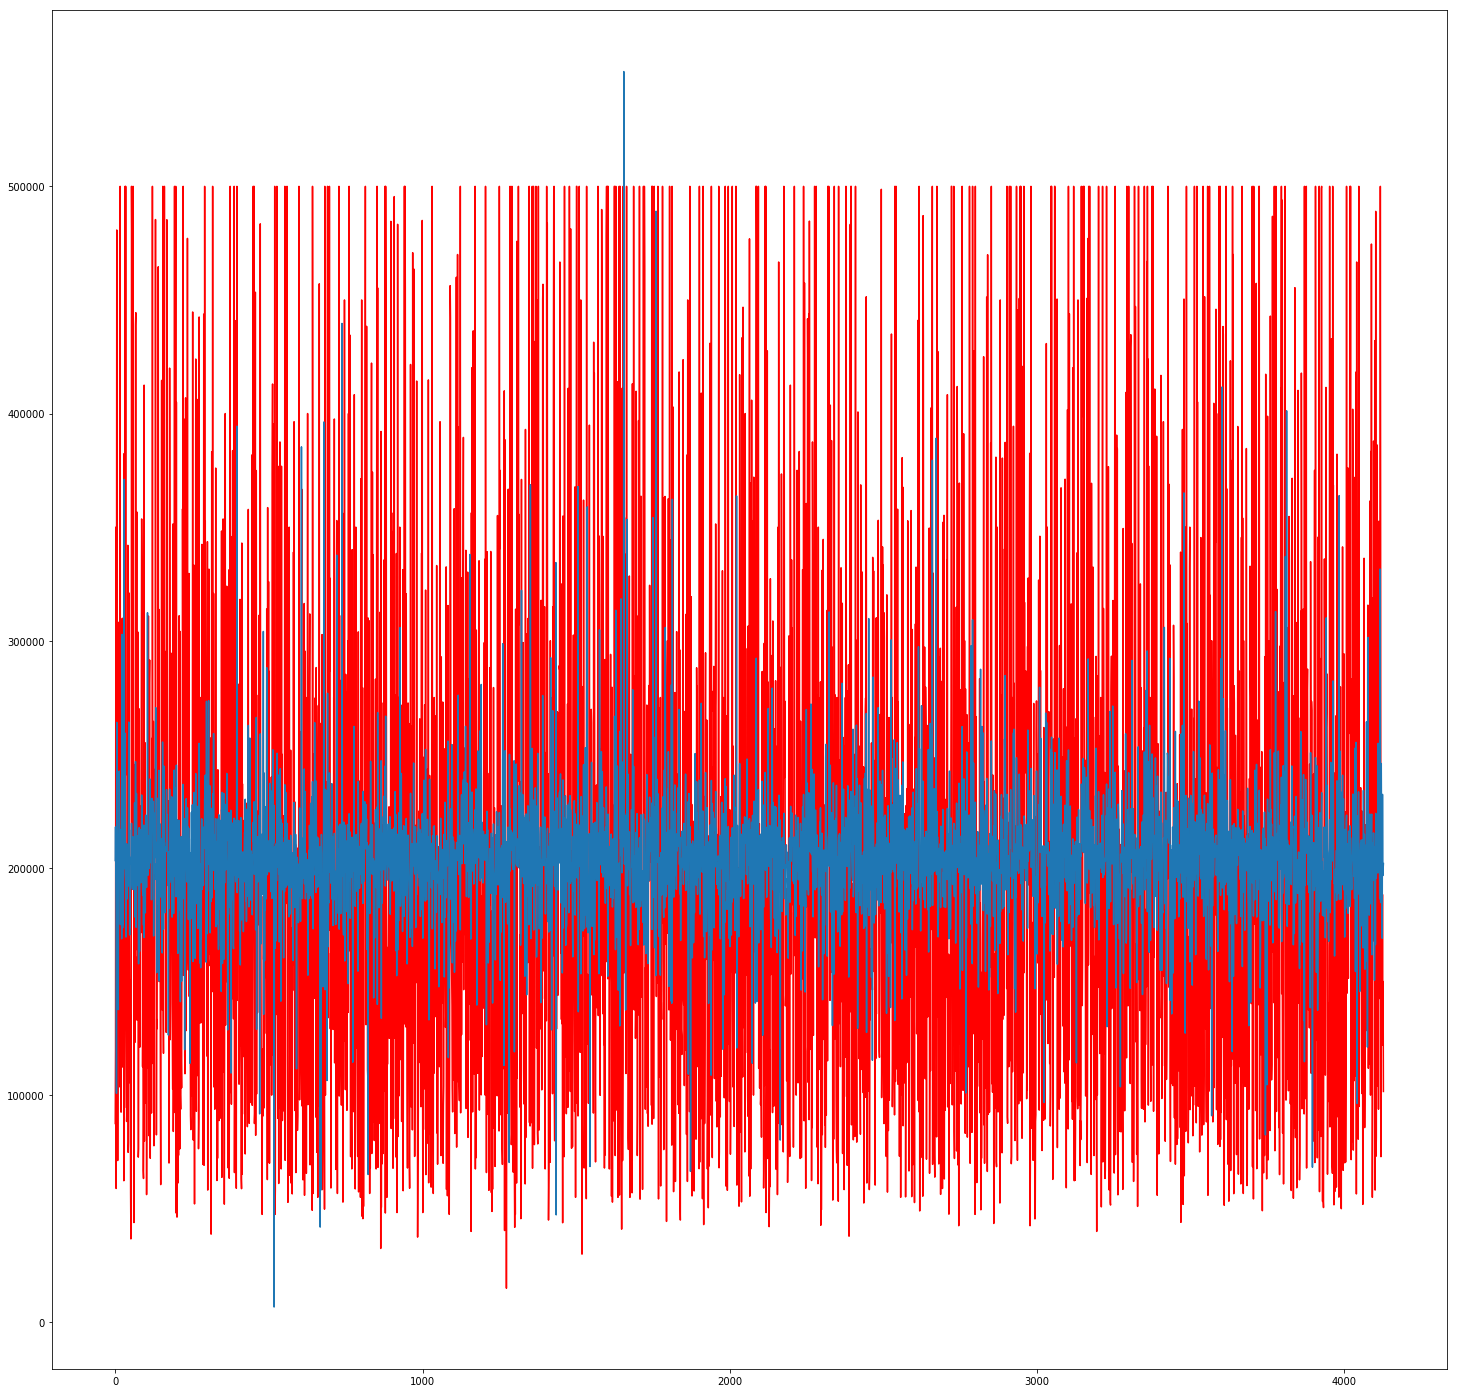

In [39]:
plt.figure(figsize=(25,25))
plt.plot(T_test,'r')
plt.plot(y_lms)

The above plot is between our actual values of our dependent variable(T_test) and the values predicted by our model for **LMS**. The values in 'Red' color reperesents our T_test values whereas values in blue points to predicted values by our model. For this graph there much difference between value actual and predicted values even as compared with **LS** method.And the extereme points in our graph, that can be because of the outliers.

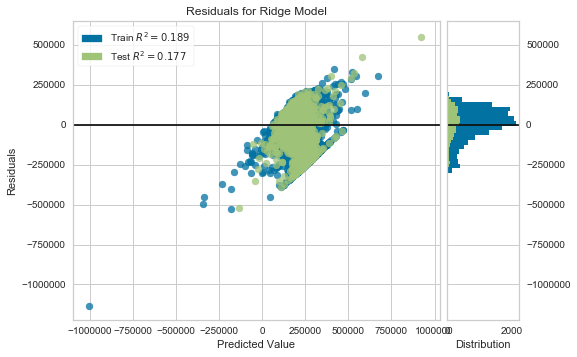

In [40]:
from sklearn.linear_model import Ridge
from yellowbrick.regressor import ResidualsPlot

ridge = Ridge()
visualizer = ResidualsPlot(ridge)

visualizer.fit(X_train, T_train)
visualizer.score(X_test, T_test) 
visualizer.poof() 

### Analysis / comparison of algorithms

Basic difference between the two algorithm is, **Least Square** use all the available data for training while **Least Mean Squares** process the data sequentially. In sequential/online learning, data is available in one by one and update the parameters accordingly. Basically, both if the algorithms calculate the weight vectors which when dot product with our feature matrix gives us the predicted values for our model. 

From the code's perspective, **Least Square** class(LinearRegress) has 'train' method which is accepting feature matrix and Target vector and based on them, it calculates the weight vector and kept it stored in class variable(self.w). Further, 'use' method calulates the final predicted values by dot product of feature matrix and weight vector(self.w) and finally returned that predicted vector. While **Least Mean Squares** has some different approach from Least Squares method. In 'train' method, it is  just iterating over the number of samples in our dataset and for ech sample it is calling 'train_step'. In 'train_step' method, it is accepting single sample vector and its corresponding value of dependent variable as vector. It estimates weight new vector with the help of previous weight vector and at the end it gives us final weight vector (May or May not be best). 'use' method estimates the final vector of predicted value. Also we have claculate Root Mean Square for the algorithms, just get an rough idea that how good our model is. In my case, the value for RMSE is high, so it might be possible due to our dataet and might be improved by removing the unimportant feature from our datasets.

From the visualization of the algorithms above, we have plot the points between our target test points and target values predicted by our model. For of the algorithms the 'red' points represents the 'T_test' data and blue points represents our 'y_ls'(predicted values). For the **Least Squares** method we can visualize that there is significant difference between the actual and predicted values, which means the accuracy of our model not good. And apart from the visualization, we can also conclude this by computing the value of 'Root Mean Square Value' of our model, which was really high as it should be. On the other hand, for **Least Mean Squares** algorithm we can analyze rom its plot that it has really a big difference between actual and predicted values. Even after comparing its accuracy with 'Least Squares', it has much more error rate than 'Least Squares' algorithm. And this can also be concluded from 'RMSE' value calculated for this model(109250.73053461527) whih is pretty high. I got this value after trying out number of times with different **Learning Rate**, so 'LMS' is getting best value around .00029999 as learning rate. Below/ Beyond this learning rate the accuracy for LMS decline more.



## Additional Analysis

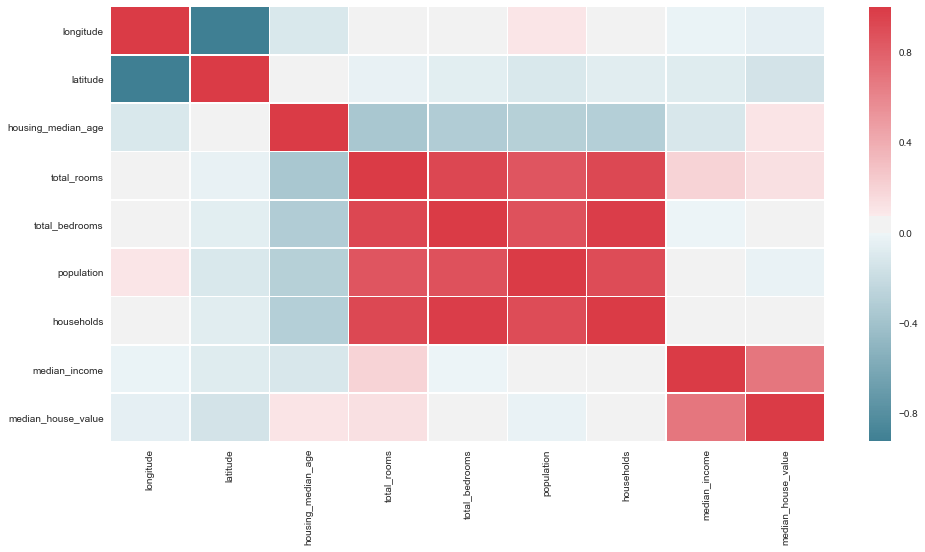

In [41]:
cmap = sb.diverging_palette(220, 10, as_cmap=True) 
corr = dataset.corr() 
plt.figure(figsize = (16,8)) 
sb.heatmap(corr, xticklabels=corr.columns.values, yticklabels=corr.columns.values, cmap=cmap, linewidths=.5)

From the above heat map and below stated comparision, we can conclude that median_income is the only attribute that is highly correlated with our target varible. 

In [42]:
corr['median_house_value'].sort_values(ascending = False)

median_house_value    1.000000
median_income         0.688075
total_rooms           0.134153
housing_median_age    0.105623
households            0.065843
total_bedrooms        0.049686
population           -0.024650
longitude            -0.045967
latitude             -0.144160
Name: median_house_value, dtype: float64

In [43]:
dataset.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


### 1. Analysis only with highly correlated variable and Target Value.

In [44]:
X1 = dataset.iloc[:, 7:8].values
T1 = dataset.iloc[:, 8:9].values

In [45]:
X_train, T_train, X_test, T_test = partition(pd.DataFrame(X1), pd.DataFrame(T1))

In [46]:
print("Shapes of X_train{},T_train{}, X_test{}, T_test{}".format(X_train.shape, T_train.shape, X_test.shape, T_test.shape))

Shapes of X_train(16512, 1),T_train(16512, 1), X_test(4128, 1), T_test(4128, 1)


**For Least Square**

In [47]:
ls1 = LinearRegress()
ls1.train(X_train, T_train)
y_ls1 = ls1.use(X_test)

In [48]:
np.sqrt(np.mean((T_test - y_ls1)**2))

83598.14940382398

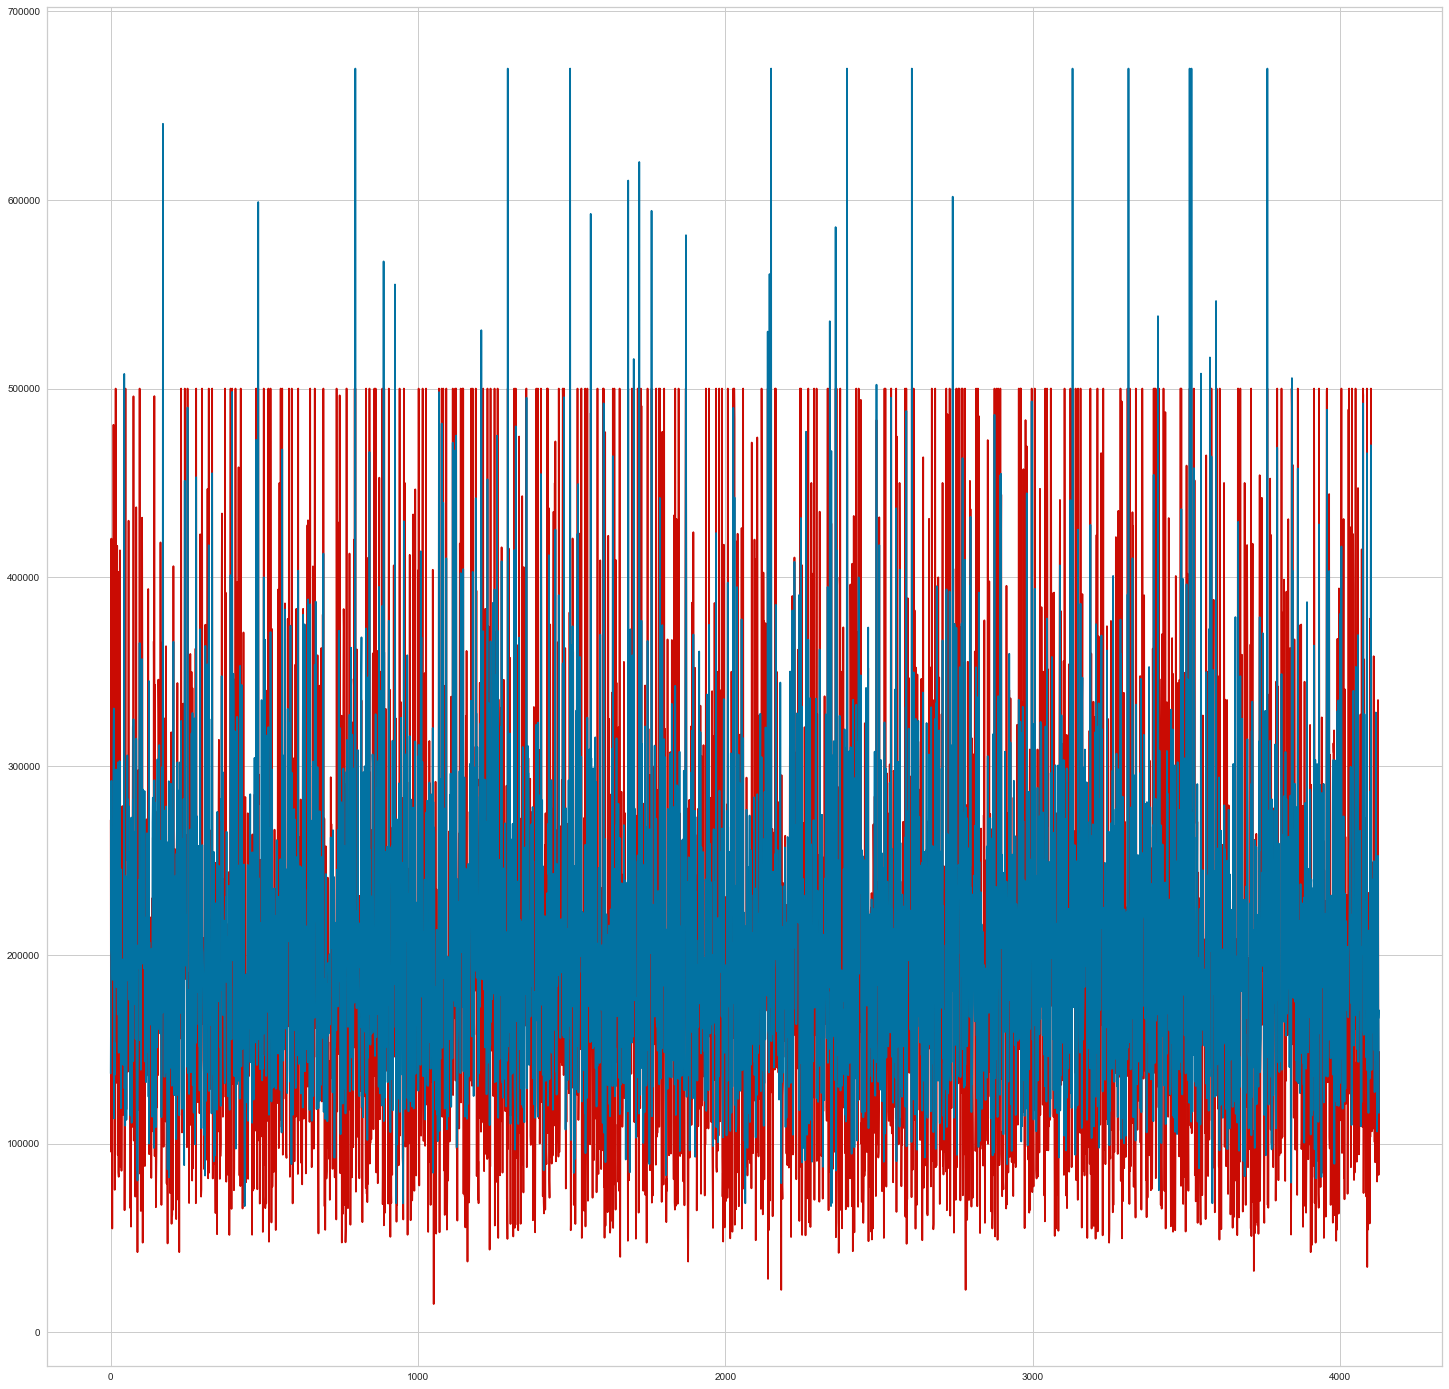

In [49]:
plt.figure(figsize=(25,25))
plt.plot(T_test,'r')
plt.plot(y_ls1)

Even after removing all other attributes and keeing the most correlated one does not improve our model accuracy. It even gets more worse. Even RMSE values upadted(83598.14940382398) is greater than that of previous one(69834.49897288298). This can also be visualized from plot above in which difference between actual and predicted value is gretaer than that of previous one and for some value its too large than the actual ones.

**For Least Mean Squares**

In [50]:
lms1 = LMS(.009)
lms1.train(X_train, T_train)
y_lms1 = lms1.use(X_test)

In [51]:
np.sqrt(np.mean((T_test - y_lms1)**2))

83570.52637361722

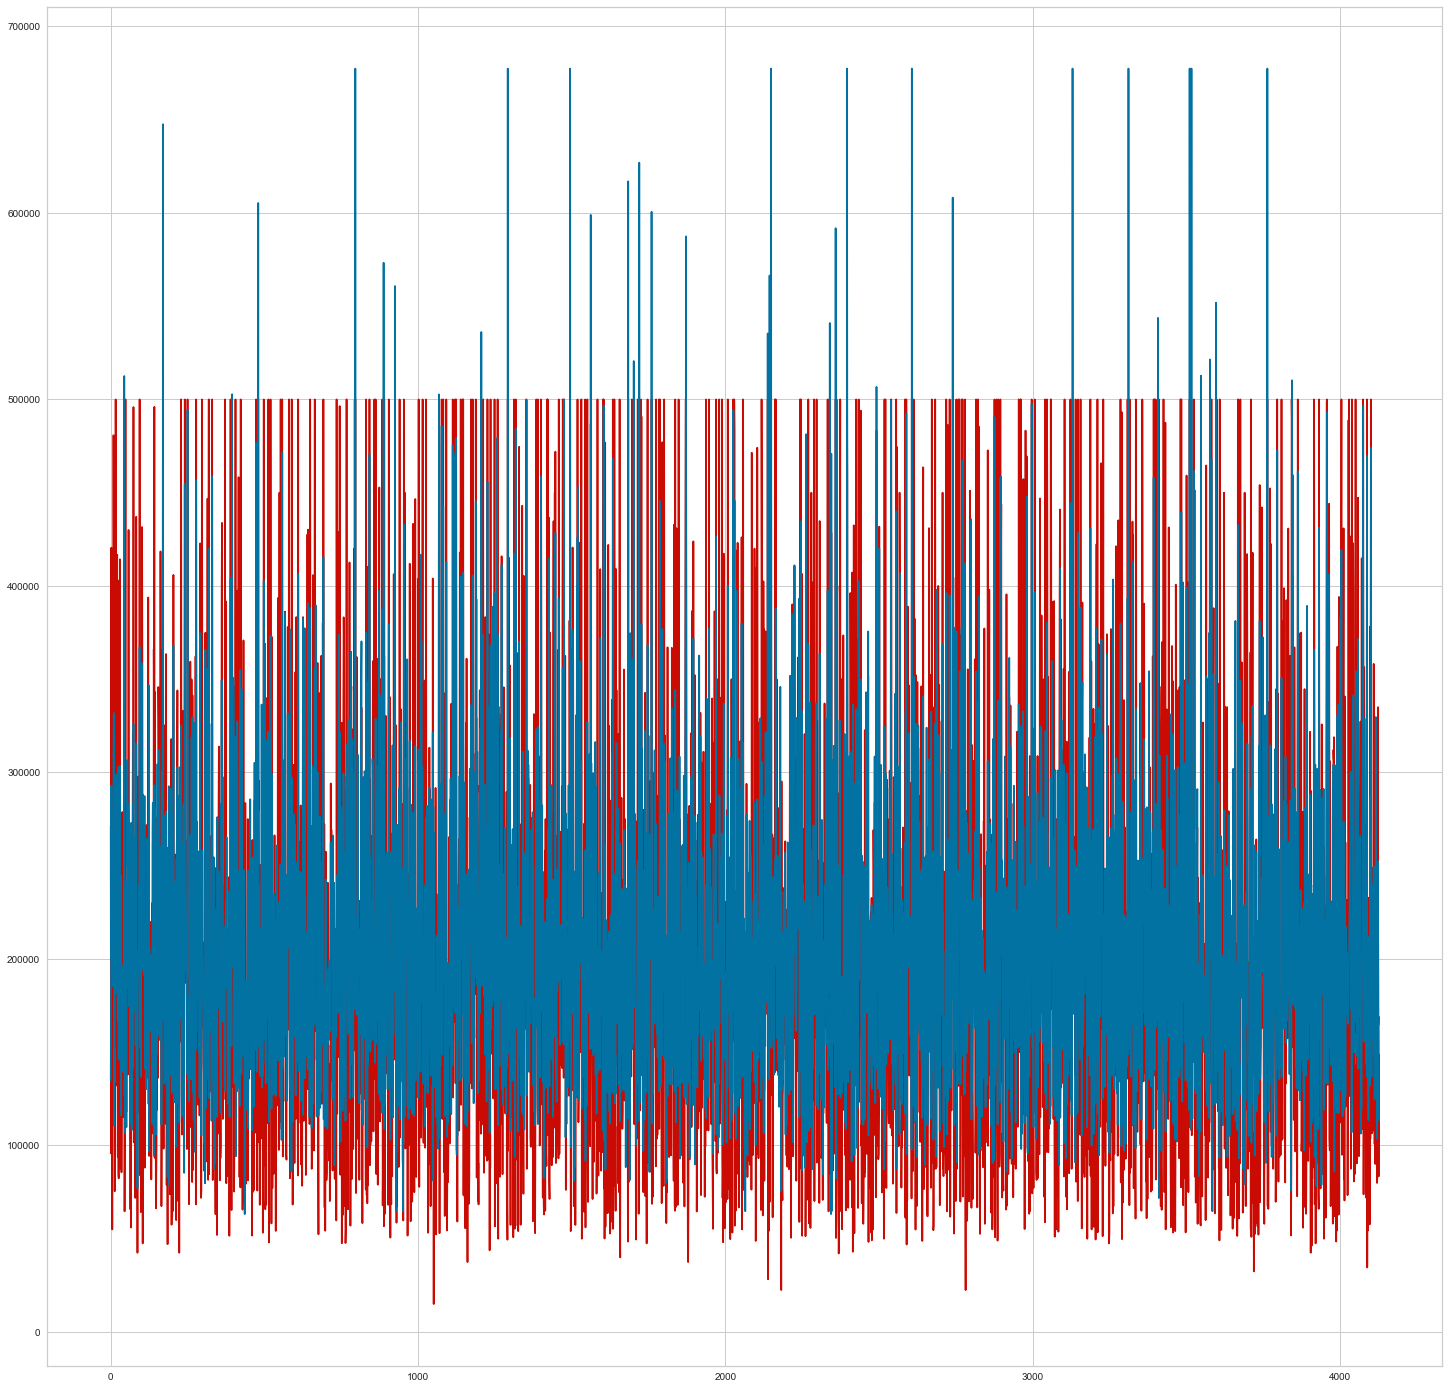

In [52]:
plt.figure(figsize=(25,25))
plt.plot(T_test,'r')
plt.plot(y_lms1)

While the trend gets opposite in the case of LMS. The accuracy of the model gets improved from the earlier one as the new RMSE value (109521.48889574091) is smaller than that of earlier one(83570.52637361722) for the same learning rate. It does not vary much if the learning rate is is increased a little bit (above .09), but the model get worse if learning rate is increased too much.

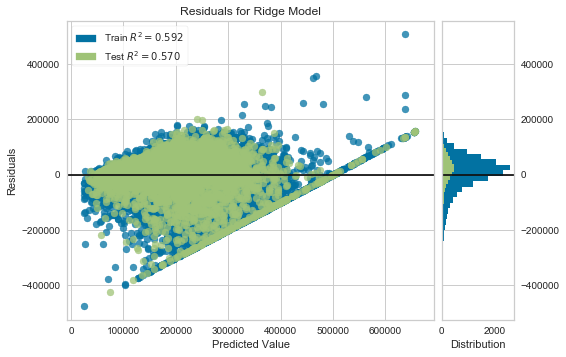

In [76]:
ridge = Ridge()
visualizer = ResidualsPlot(ridge)

visualizer.fit(X_train, T_train)
visualizer.score(X_test, T_test) 
visualizer.poof() 

### 2. Highly correlated with other positively correlated attributes

In [53]:
X2 = pd.concat([dataset.iloc[:,:9], pd.get_dummies(dataset.loc[:,'ocean_proximity'])],axis=1)

In the above cell we have just perform dummy encoding to handle categorical data.

In [54]:
corr = X2.corr()
corr['median_house_value'].sort_values(ascending = False)

median_house_value    1.000000
median_income         0.688075
<1H OCEAN             0.256617
NEAR BAY              0.160284
NEAR OCEAN            0.141862
total_rooms           0.134153
housing_median_age    0.105623
households            0.065843
total_bedrooms        0.049686
ISLAND                0.023416
population           -0.024650
longitude            -0.045967
latitude             -0.144160
INLAND               -0.484859
Name: median_house_value, dtype: float64

From above, we can analyze that Ocean_proximity is also important attribute in determining the house values.
So we will try analyze by keeping median_income with ocean_proximity as our predictors.

In [55]:
X3 = pd.concat([X2.iloc[:,7:8], X2.iloc[:,9:10], X2.iloc[:,11:]],axis=1)
T3 = X2.iloc[:,8:9]
X3 = X3.values
T3 = T3.values

Out of all the attributes of ocean_proximity, we have excluded INLAND beacuse it has very high negative correlation with our target value.

In [56]:
print("Shapes of X3{} T3{}".format(X3.shape, T3.shape))

Shapes of X3(20640, 5) T3(20640, 1)


In [57]:
X_train, T_train, X_test, T_test = partition(pd.DataFrame(X3), pd.DataFrame(T3))

In [58]:
# For Least Square
ls2 = LinearRegress()
ls2.train(X_train, T_train)
y_ls2 = ls2.use(X_test)

In [59]:
np.sqrt(np.mean((T_test - y_ls2)**2))

74599.51104899103

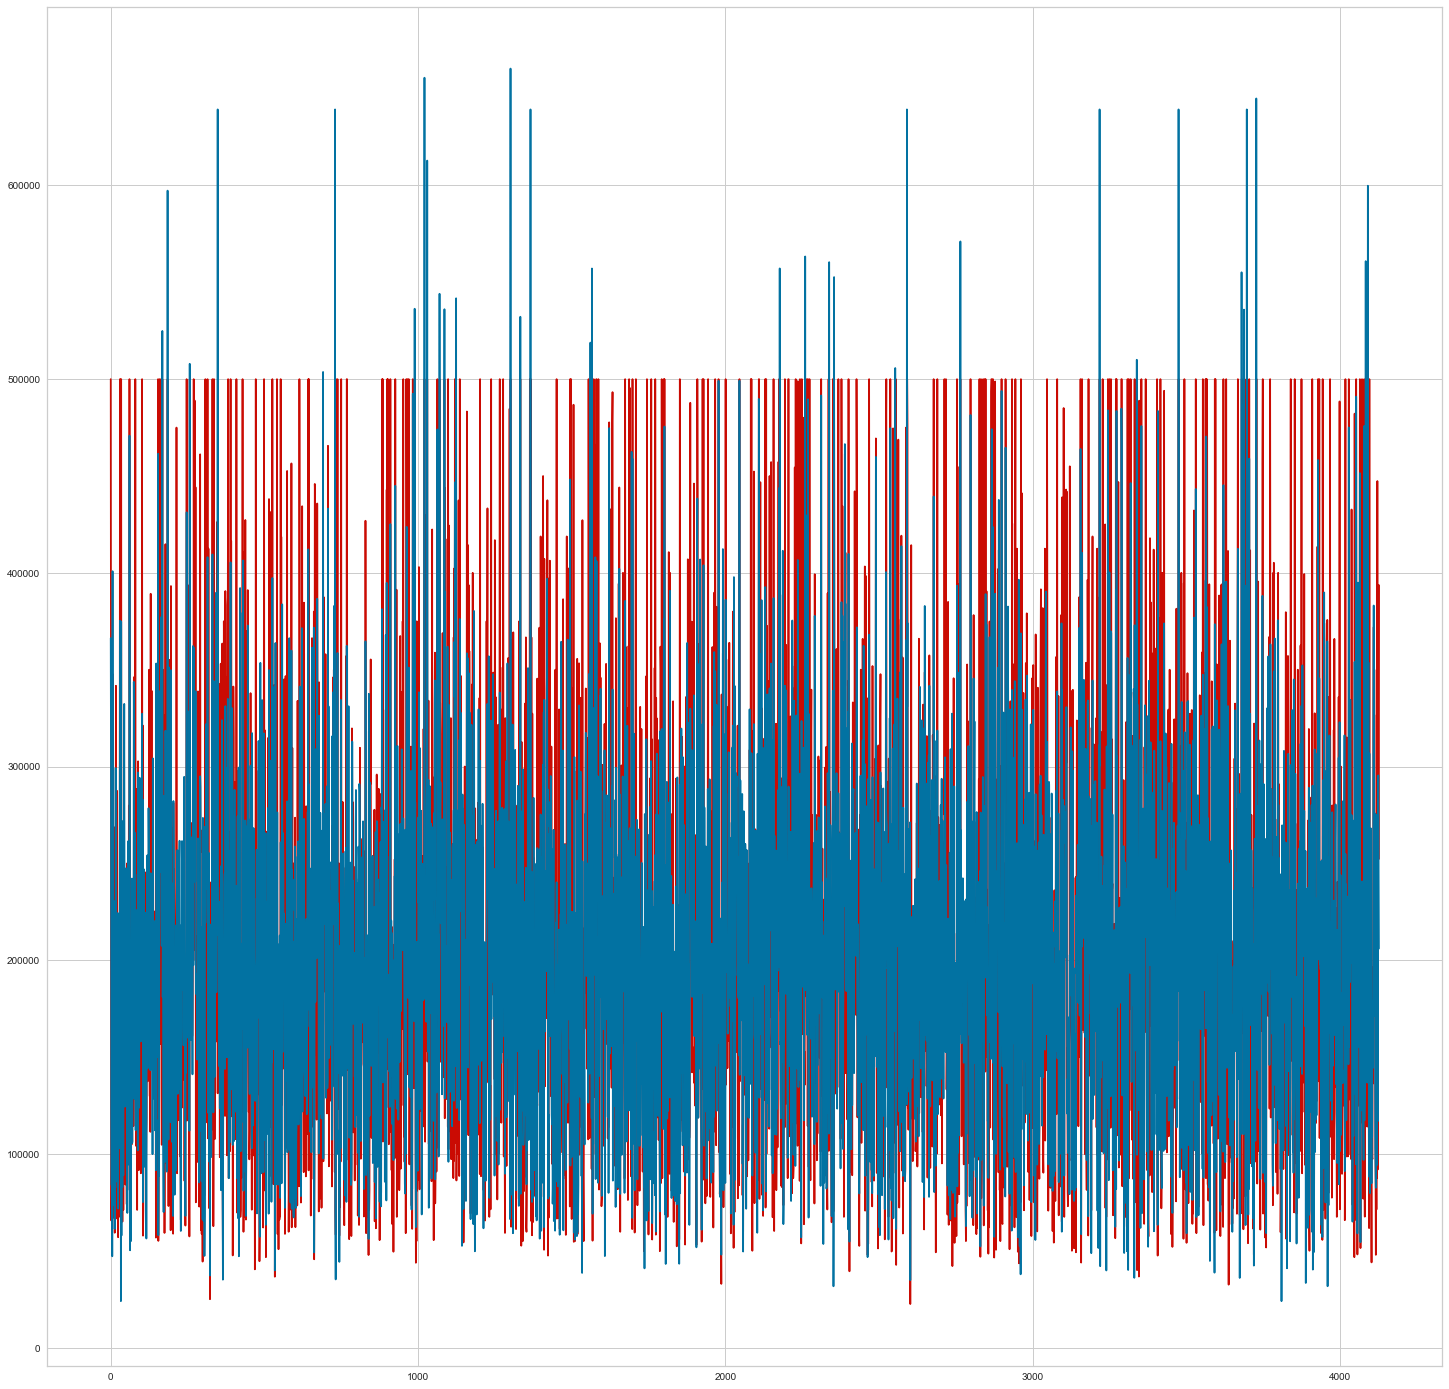

In [60]:
plt.figure(figsize=(25,25))
plt.plot(T_test,'r')
plt.plot(y_ls2)

For this observation, we took those attributes which are most positively correlated with our Target value. And we observed that plot as well as RMSE value gets better as compared to the previous ibservation where we just kept only one predictor.

In [61]:
lms2 = LMS(.009)
lms2.train(X_train, T_train)
y_lms2 = lms2.use(X_test)

In [62]:
np.sqrt(np.mean((T_test - y_lms2)**2))

74703.78506627632

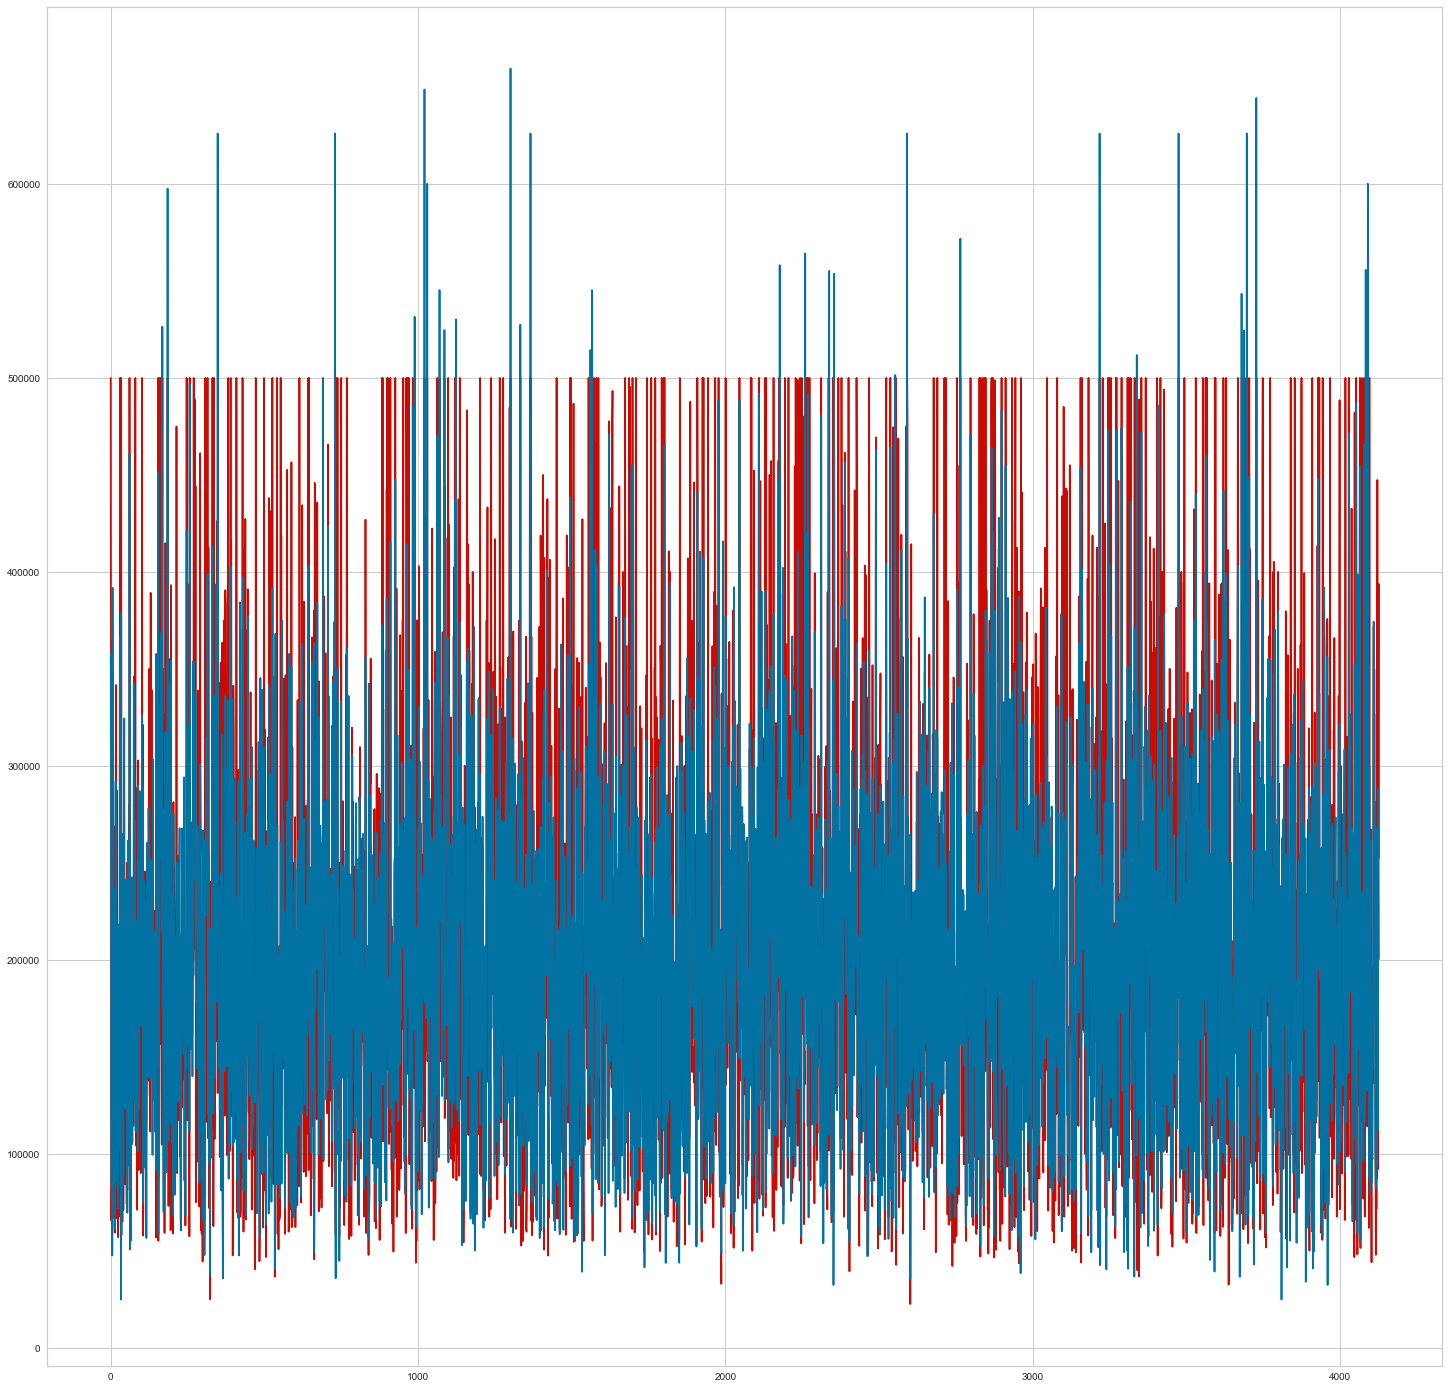

In [63]:
plt.figure(figsize=(25,25))
plt.plot(T_test,'r')
plt.plot(y_lms2)

We can clearly observe that LMS is getting better and better each we are considering positively correlated columns. Like of this case RMSE vaue has improved over the previous ones and we can also visualize the difference between red and blue points. 

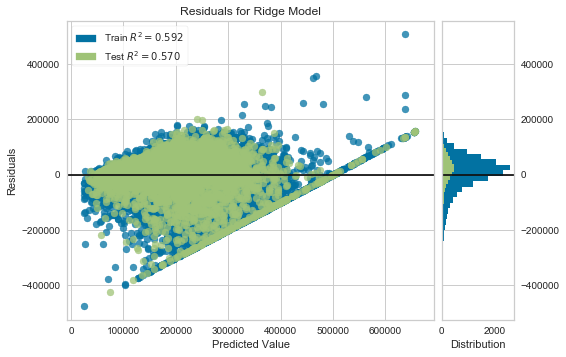

In [77]:
ridge = Ridge()
visualizer = ResidualsPlot(ridge)

visualizer.fit(X_train, T_train)
visualizer.score(X_test, T_test) 
visualizer.poof() 

### 3. In this observation we will consider above attributes with one highly negatively correlated feature.

In [64]:
X3 = pd.concat([dataset.iloc[:,:9], pd.get_dummies(dataset.loc[:,'ocean_proximity'])],axis=1)

In [65]:
corr = X3.corr()
corr['median_house_value'].sort_values(ascending = False)

median_house_value    1.000000
median_income         0.688075
<1H OCEAN             0.256617
NEAR BAY              0.160284
NEAR OCEAN            0.141862
total_rooms           0.134153
housing_median_age    0.105623
households            0.065843
total_bedrooms        0.049686
ISLAND                0.023416
population           -0.024650
longitude            -0.045967
latitude             -0.144160
INLAND               -0.484859
Name: median_house_value, dtype: float64

In [66]:
X4 = pd.concat([X3.iloc[:,7:8], X3.iloc[:,9:]],axis=1)
T4 = X3.iloc[:,8:9]
X4 = X4.values
T4 = T4.values

Now apart rom the above observation attributes, we have considered 'INLAND' attribute for observation.

In [67]:
print("Shapes of X3{} T3{}".format(X3.shape, T3.shape))

Shapes of X3(20640, 14) T3(20640, 1)


In [68]:
X_train, T_train, X_test, T_test = partition(pd.DataFrame(X4), pd.DataFrame(T4))

In [69]:
# For Least Square
ls3 = LinearRegress()
ls3.train(X_train, T_train)
y_ls3 = ls3.use(X_test)

In [70]:
np.sqrt(np.mean((T_test - y_ls3)**2))

510506.56619299256

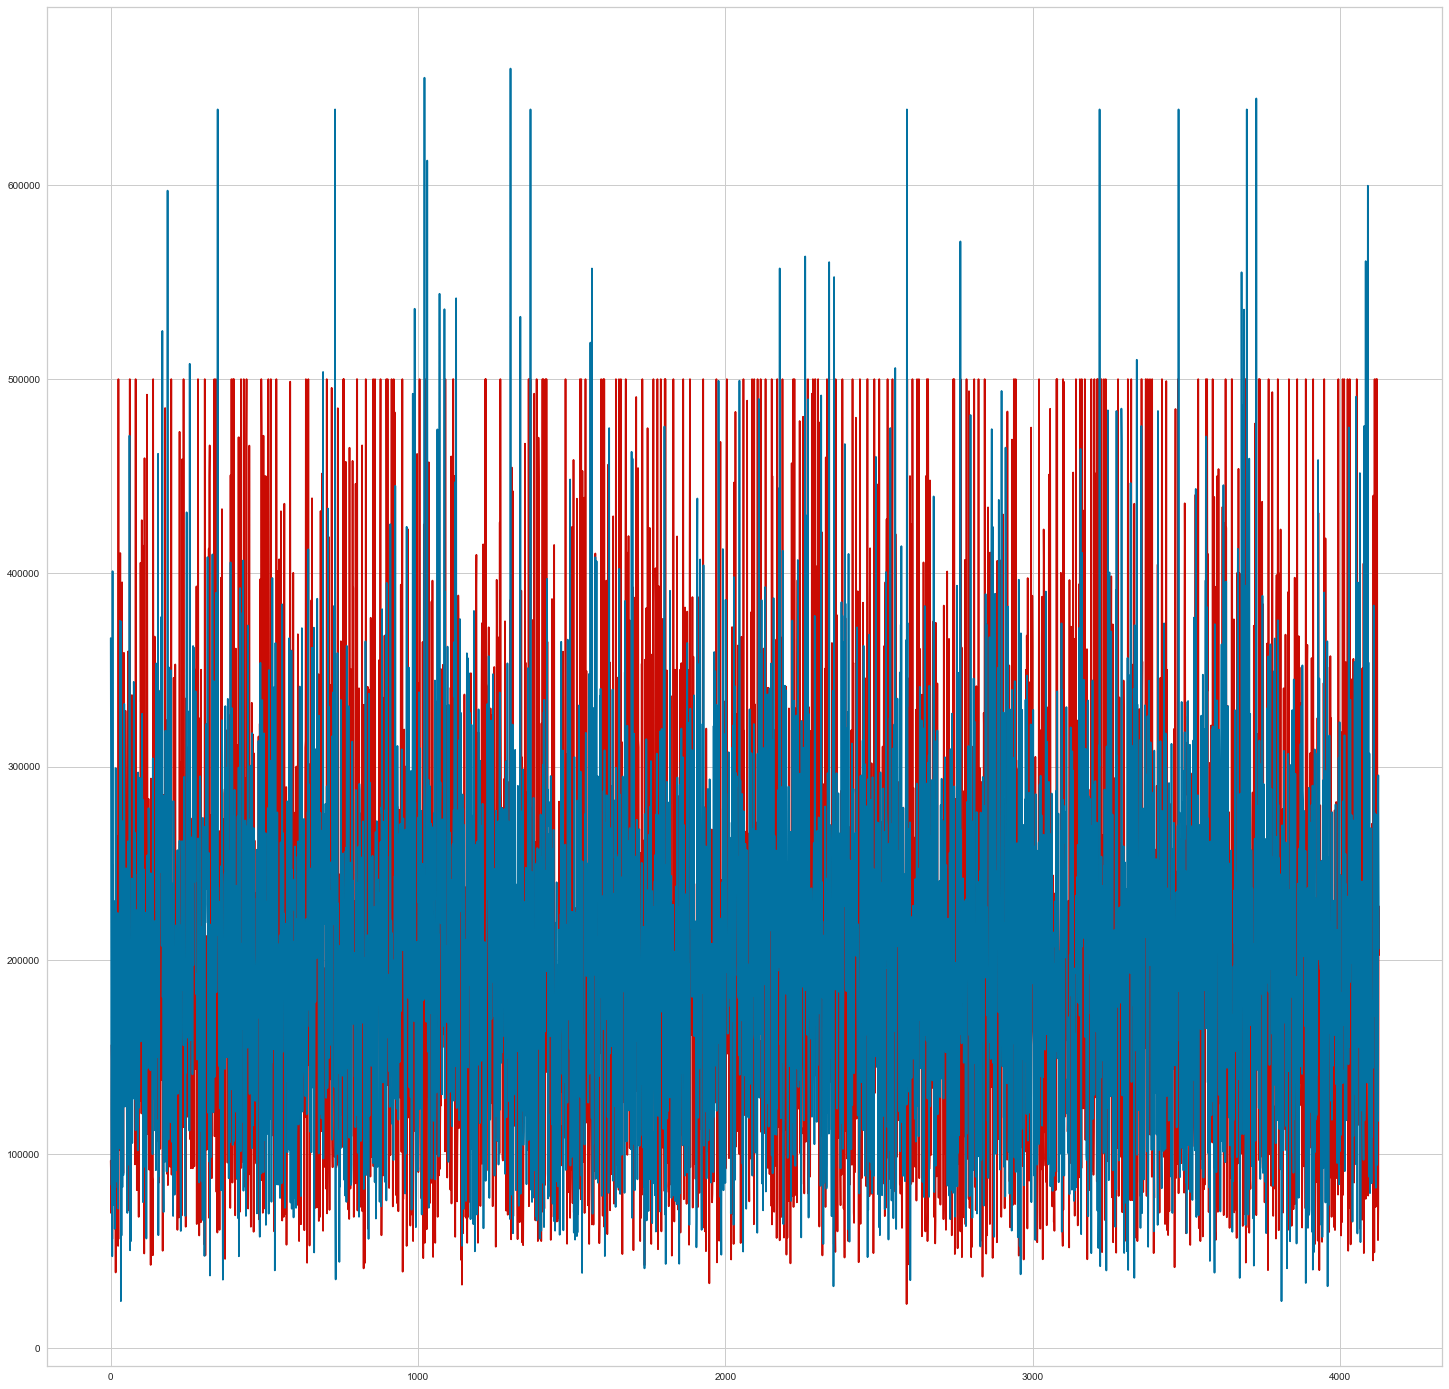

In [71]:
plt.figure(figsize=(25,25))
plt.plot(T_test,'r')
plt.plot(y_ls2)

From the above graph and RMSE of 'Linear Squares', we observe that our model gets significantly worse. Its RMSE changes from 69834.49897288298 to 510506.56619299256. It happens just by including the highly negative correlated attribute to our feeding data.

In [72]:
lms3 = LMS(.009)
lms3.train(X_train, T_train)
y_lms3 = lms3.use(X_test)

In [73]:
np.sqrt(np.mean((T_test - y_lms3)**2))

79468.54265692957

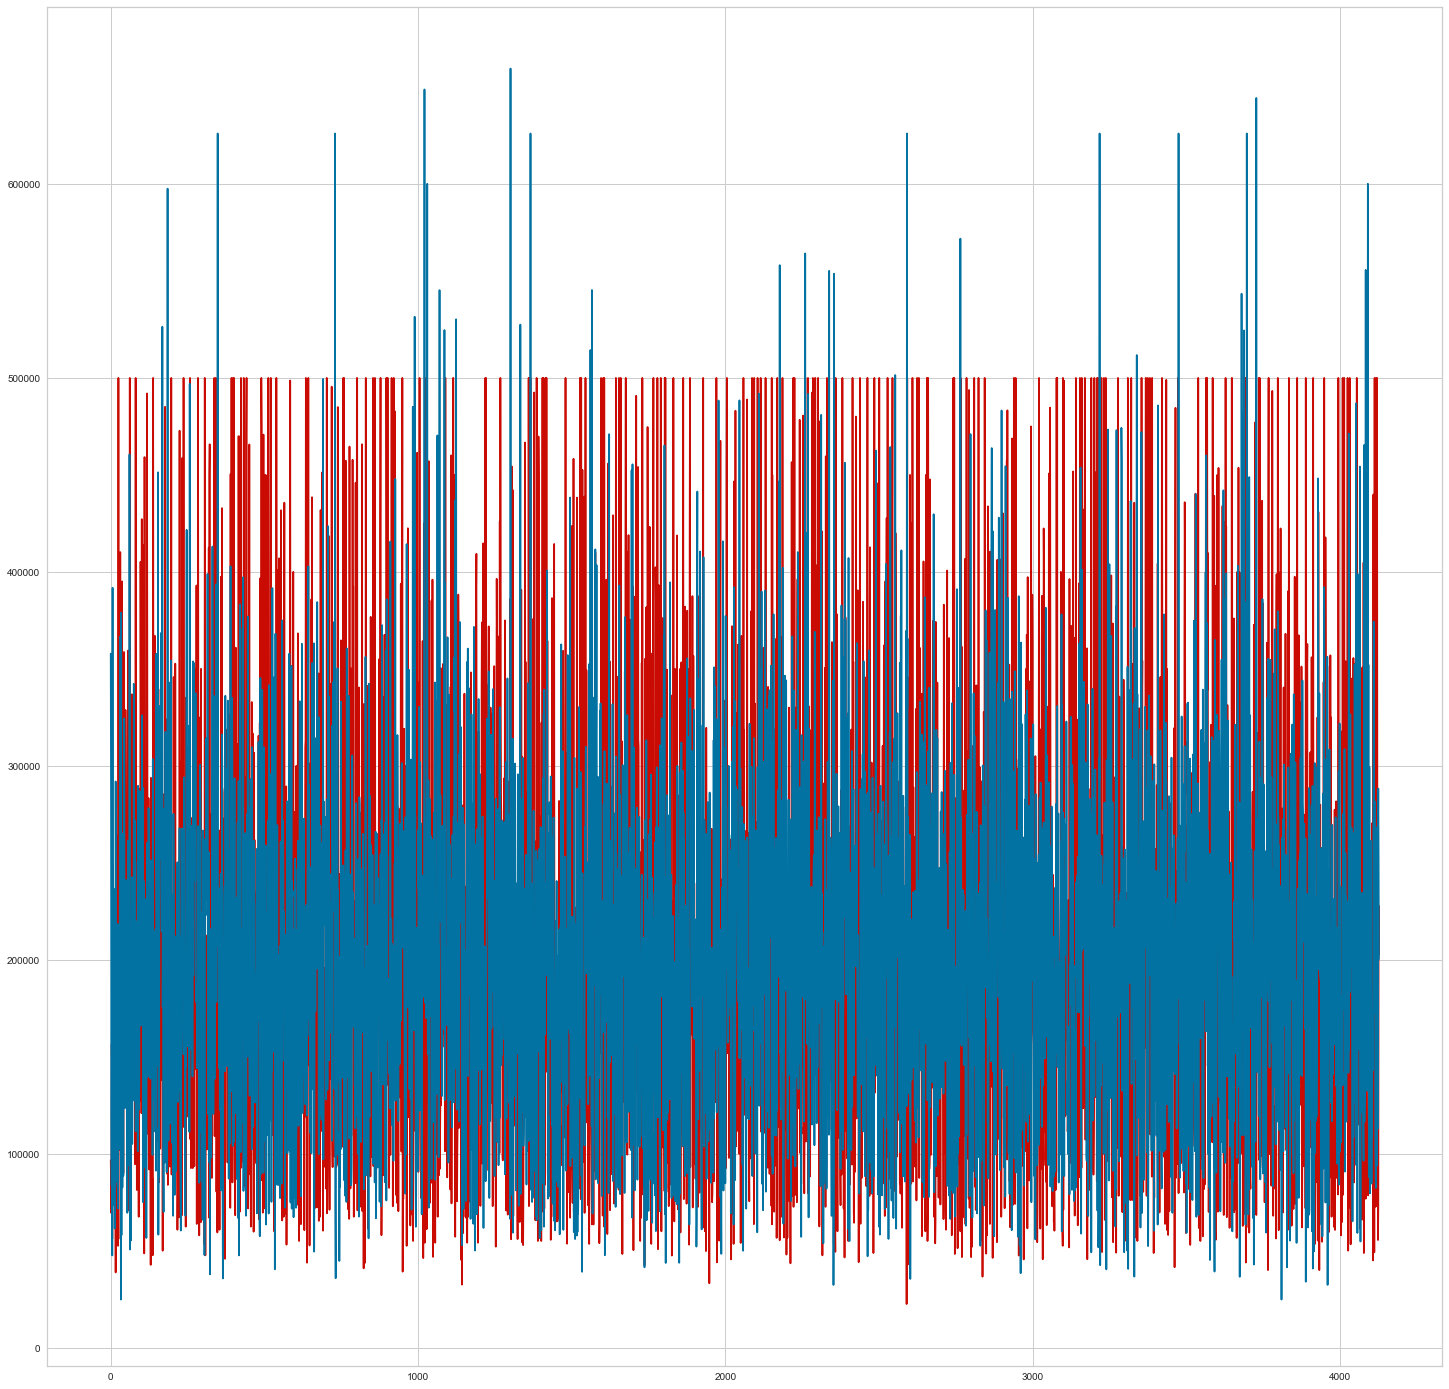

In [74]:
plt.figure(figsize=(25,25))
plt.plot(T_test,'r')
plt.plot(y_lms2)

Like LS, LMS follows the same trend but not increased to that extent as it was the case for LS. Its RMSE value has increased a little bit from the previous observation.

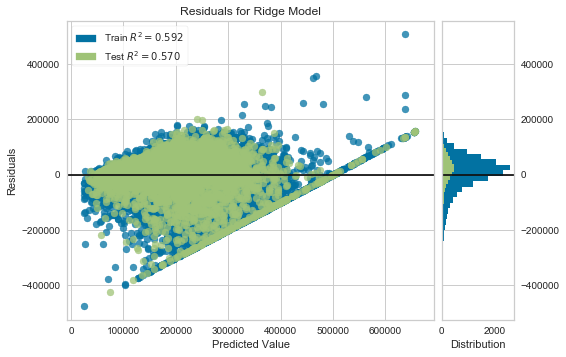

In [78]:
ridge = Ridge()
visualizer = ResidualsPlot(ridge)

visualizer.fit(X_train, T_train)
visualizer.score(X_test, T_test) 
visualizer.poof() 

# Conclusion

In this assignment, apart from just basic visualization of data and some preprocessing the data , I have learned about Linear Model of the Supervised Learning and how the Linear Model works to obtain best fitting line for our dataset. We have discussed and implemented two important algorithms **Least Squares** and **Least Mean Squares** to obtain best fit line for our model. Apart from just implementinng these algorithm, I learned much more about the preprocessing of our data like I have used **LabelBinarizer** for handing the categorical data and **normalize** the data in our dataset, so that all our feature values will be on same scale to get good prediction model.

As far as both the algorithms are concerned, both of them revolves around Error function, calculated by taking the Euclidean distance between predicted and actual value. Both algorithms calculates the best possible weights which when dot product with feature matrix gives us the predicted values. But the approach they followed is different. **Least Square** takes and process the data in one go while **LMS** process the data sequentially, which is called Online Learing. LMS just iterate over number of samples and calculatee the weight vector each time and at the end it calulates the predicted value on the best weights we get through the process. 

First of all we read the data and try to visualize the data without applying any algorithm. Then, preprocess the data- checks the correlation between the attributes, handling the missing value, encode the categorical data and further normalize the data to  scale all the attributes to get better prediction value. We then split our datasets into training and test sets. We feed our algorithm with training sets and further analyze its prediction on test set with actual values. For the accuracy we calculated Root Mean Sqaure values  to check how accurate our model is (Lesser the value, better our model). Finally, we plot the predicted value with actual value and observed how much is the difference between our actual and predicted values.

First we applied our algorithm on the complete dataset we get, but further when try to improve our model with removing some less important column from our dataset, we observe deviation from the model we get on complete dataset. Both of the algorithm shows positive response when we filtered columns by keeping only positively correlated columns. But we observe one deviation in our model in case of **Least Squares** when we include one negatively correlated column with the positives one but **LMS** was improved a bit.

So to obtain best model, we have to take care of each part like preprocess the data completely, understand the importance of each attribute with our target attribute. Filter out the data which can affect our data and keep the necessary attributes. 

# References

Pace, R. Kelley and Ronald Barry, 'Sparse Spatial Autoregressions, Statistics and Probability Letters, https://www.kaggle.com/harrywang/housing/home

Hunter, J. D. "Matplotlib: A 2D graphics environment",Computing In Science & Engineering, IEEE COMPUTER SOC, 9, 90-95 (2007), https://matplotlib.org/tutorials/introductory/sample_plots.html

Travis E, Oliphant. A guide to NumPy, USA: Trelgol Publishing, (2006), http://www.numpy.org/

Wes McKinney. Data Structures for Statistical Computing in Python, Proceedings of the 9th Python in Science Conference, 51-56 (2010), http://pandas.pydata.org/pandas-docs/version/0.15.2/generated/pandas.DataFrame.replace.html 

Aurélien Géron, "Hands on Machine learning with scikit learn and Tensorflow", O'Reilly Media, 2017